# Challenge 3

In [1]:
# import libraries here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


#### Import the titanic file. Name your dataset `titanic`.

In [2]:
titanic = pd.read_csv('./titanic.csv',low_memory=False)
titanic.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


#### Explore the titanic dataset using Pandas dtypes

In [3]:
#your code here
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?

*Hint: Use Pandas `select_dtypes`*

In [61]:
# your code here- numerical variable
#num_cols = titanic._get_numeric_data().columns
titanic.select_dtypes(include=["number"])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.000000,1,0,7.2500
1,2,1.0,1,38.000000,1,0,71.2833
2,3,1.0,3,26.000000,0,0,7.9250
3,4,1.0,1,35.000000,1,0,53.1000
4,5,0.0,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
1304,1305,NaN,3,29.513190,0,0,8.0500
1305,1306,NaN,1,39.000000,0,0,108.9000
1306,1307,NaN,3,38.500000,0,0,7.2500
1307,1308,NaN,3,29.513190,0,0,8.0500


In [62]:
#your code here- categorical variable
titanic.select_dtypes(include=["bool","object"])

,Name,Gender,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,U0,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,U0,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,U0,S
...,...,...,...,...,...
1304,"Spector, Mr. Woolf",male,A.5. 3236,U0,S
1305,"Oliva y Ocana, Dona. Fermina",female,PC 17758,C105,C
1306,"Saether, Mr. Simon Sivertsen",male,SOTON/O.Q. 3101262,U0,S
1307,"Ware, Mr. Frederick",male,359309,U0,S


#### Set the plot style to `classic` and the figure size to `(12,6)`

*Hint: To set the style you can use `matplotlib.pyplot` functions or seaborn*

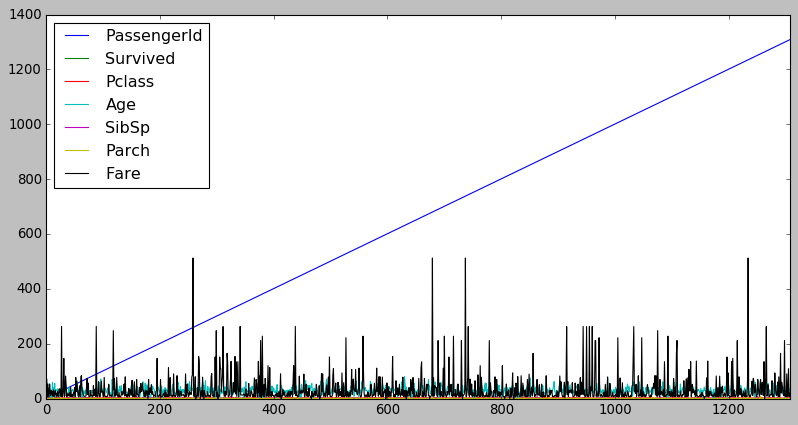

In [8]:
# your code here
plt.style.use('classic')
titanic.plot(figsize=(12,6))


#### Use the appropriate visulalization to show the distribution of the column `Age`

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2f8b713b90>]],
      dtype=object)

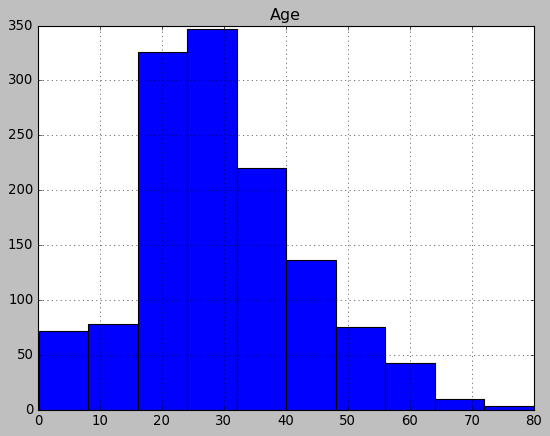

In [7]:
# your code here
titanic.hist(column='Age')

#### Use subplots to plot the distribution of the `Age` variable with bins equal to `10`, `20` and `50`.

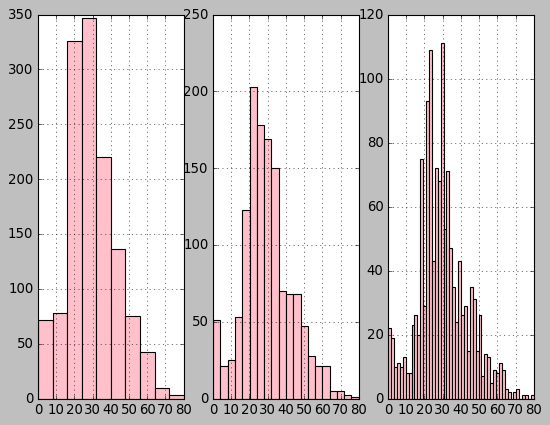

In [9]:
# your code here
plt.subplot(1,3,1)
titanic['Age'].hist(bins=10, color='pink')
plt.subplot(1,3,2)
titanic['Age'].hist(bins=20, color='pink')
plt.subplot(1,3,3)
titanic['Age'].hist(bins=50, color='pink')

#### Whether the bin size affects your plot? Why?

In [ ]:
#your comment here

Every other bin we add to the plot, it means the total population distributes in between more bins, making them thinner. 

#### Use seaborn to show the distribution of the column `Age`

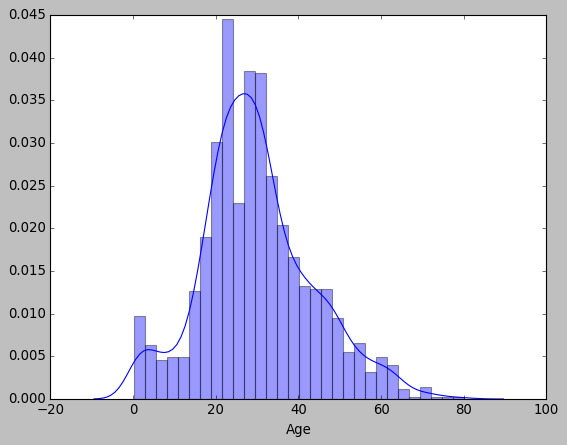

In [10]:
# your code here
sns.distplot(titanic['Age'])

#### Use the appropriate plot to visualize the column `Gender`. There are 2 ways of doing it. Do it both ways.

*Hint: Use matplotlib and seaborn*

Text(0, 0.5, 'Count')

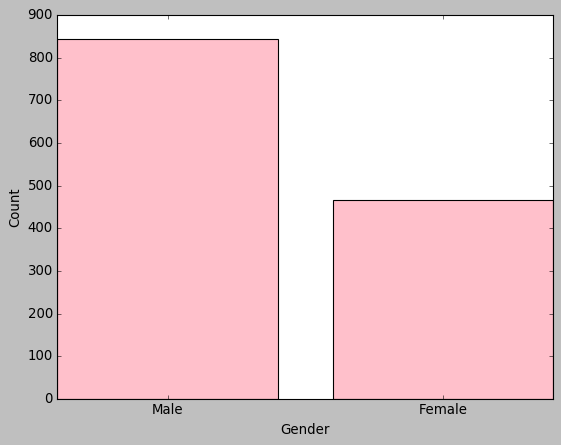

In [28]:
# your code here- 1nd way

males = titanic[titanic.Gender =='male'].Gender.count()
females = titanic[titanic.Gender =='female'].Gender.count()
plt.bar(['Male', 'Female'], [males,females], color='pink')
plt.xlabel('Gender')
plt.ylabel('Count')

#plt.hist(titanic['Gender'])

Text(0, 0.5, 'Count')

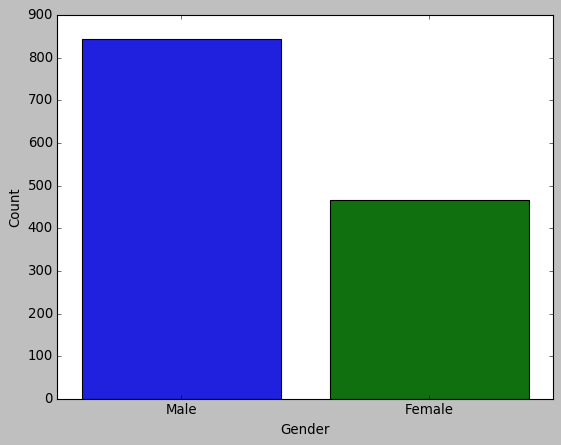

In [16]:
# your code here- 2nd way
sns.barplot(['Male', 'Female'], [males,females])
plt.xlabel('Gender')
plt.ylabel('Count')

#### Use the appropriate plot to visualize the column `Pclass` 


Text(0, 0.5, 'Count')

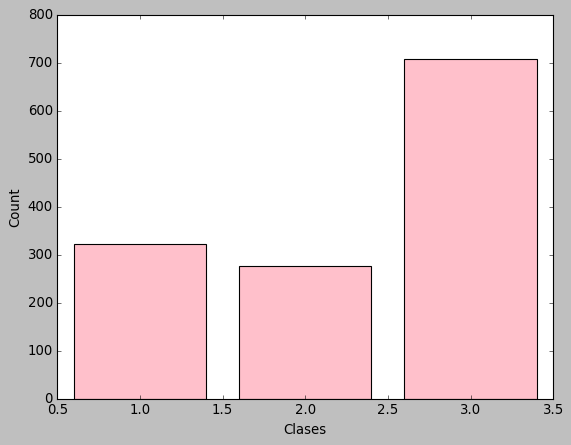

In [18]:
# your code here
primeraclase = titanic[titanic.Pclass ==1].Pclass.count()
segundaclase = titanic[titanic.Pclass ==2].Pclass.count()
terceraclase = titanic[titanic.Pclass ==3].Pclass.count()
plt.bar([1,2,3], [primeraclase,segundaclase,terceraclase], color='pink')
plt.xlabel('Clases')
plt.ylabel('Count')

#### We would like to have in one single plot the summary statistics of the feature `Age`. Choose the appropriate plot to show below.

{'whiskers': [<matplotlib.lines.Line2D at 0x7f2f69c78a90>,
 'caps': [<matplotlib.lines.Line2D at 0x7f2f69c18c90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f2f69c474d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f2f69c2c1d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f2f69c36cd0>],
 'means': []}

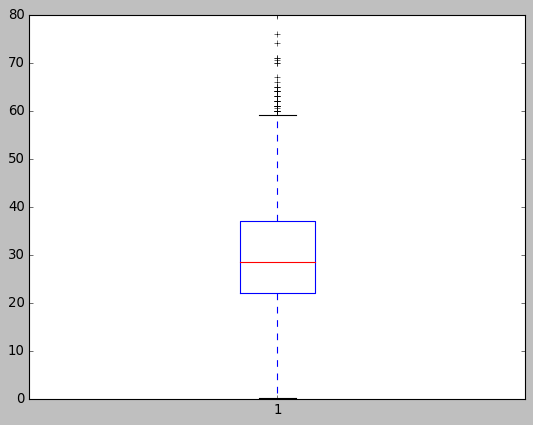

In [23]:
# your code here
plt.boxplot(titanic.Age)

#### What does the previous plot tell you about the feature `Age`? Comment.

In [24]:
# your comment here

A boxplot is a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”). It can tell you about your outliers and what their values are.

#### Now in addition to the summary statistics, we also want to visualize the distribution of `Age`. Choose the appropriate plot to show below.

{'bodies': [<matplotlib.collections.PolyCollection at 0x7f2f69813dd0>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x7f2f697adfd0>,
 'cmins': <matplotlib.collections.LineCollection at 0x7f2f69813a10>,
 'cbars': <matplotlib.collections.LineCollection at 0x7f2f697fff90>}

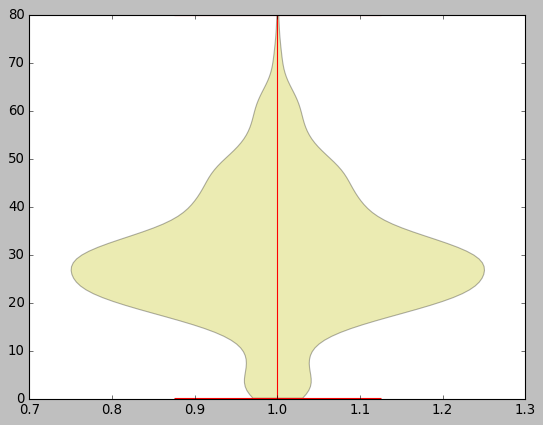

In [26]:
#your code here
plt.violinplot(titanic.Age)

#### What additional information in the previous plot provide you about the feature `Age`? Comment.

In [ ]:
#your comment here

Violin plots are similar to box plots, except that they also show the probability density of the data at different values. These plots include a marker for the median of the data and a box indicating the interquartile range, as in the standard box plots. 

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the appropriate plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.

*Hint: One of the ways involves using Seaborn*

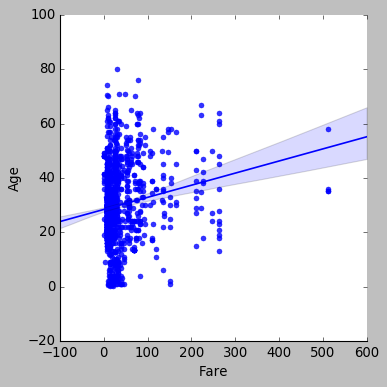

In [25]:
#your code-1st way
sns.lmplot(x="Fare", y="Age", data=titanic)

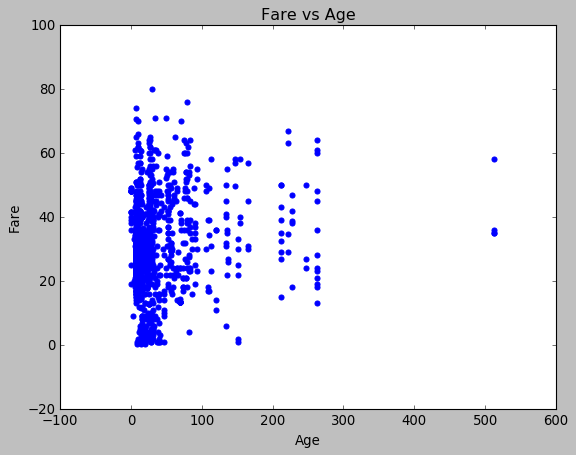

In [37]:
# your code-2nd way
x = titanic['Fare']
y = titanic['Age']
plt.scatter(x,y, color = "blue")
plt.title("Fare vs Age")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.show()

#### Using Seaborn plot the correlation matrix of various features.

*Hint: search how to use `heatmap`*

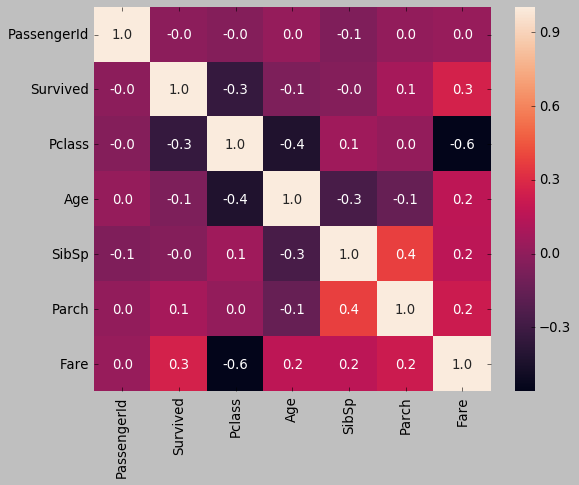

In [49]:
#your code here
sns.heatmap(titanic.corr(), fmt='.1f', annot=True)

#### According to the previous plot, what are the most correlated feature? Comment.

In [ ]:
#your comment here

Those closer to 1, so those which have a clearer color. 

#### Use the appropriate plot to display the summary statistics of the `Age` in function of the `Pclass`.

*Hint: use boxplot to display summary statistics of `Age` in relation to each of the discrete values of `Pclass`*

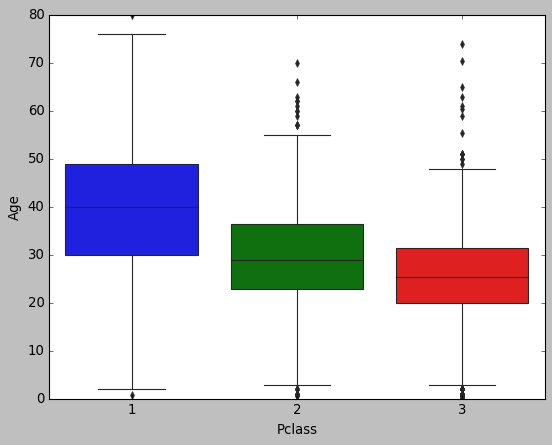

In [51]:
#your code here
sns.boxplot(x="Pclass", y="Age", data=titanic)

#### Use the appropriate plot to display the distributions of  `Age` in relation to  `Gender`.

*Hint: use Facetgrid to display the distribution of `Age` for each categorical value of `Gender`*

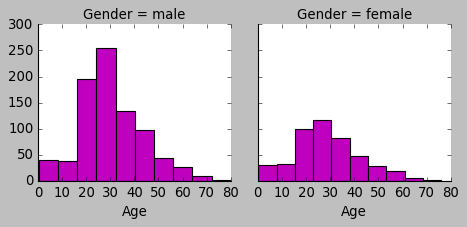

In [60]:
#your code here
g= sns.FacetGrid(titanic, col="Gender")
g.map(plt.hist, "Age", color='m')
